# Call center data modeling

You are advising a client on the number of call center agents they need to handle their customer support load. We start by modeling the number of phone calls we expect to come into the call center during each hour of the day.

You are provided with a data set of the intervals between phone calls arriving during one day. Each value is a time in minutes indicating the amount of time that passed between receiving two consecutive phone calls.

## Loading the data

In [1]:
cd C:\Users\abdur\OneDrive\Documents\CS146\2.2\2.2

C:\Users\abdur\OneDrive\Documents\CS146\2.2\2.2


In [7]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Load the data set containing durations between calls arriving at the call
# center during 1 day. All values are in minutes.
waiting_times_day = np.loadtxt('call_center.csv')

# Display some basic information about the data set.
print('Size of data set:', len(waiting_times_day))
print('First 3 values in data set:', waiting_times_day[:3])
print('Sum of data set:', sum(waiting_times_day))

Size of data set: 5856
First 3 values in data set: [30.   3.4  3.2]
Sum of data set: 1441.6838153800093


Since the values are intervals between calls measured in minutes, this means

* we assume the first call happened at 00:00 (midnight),
* the second call happened at about 00:30 (30 minutes after midnight),
* the third call happened at about 00:33 (30 + 3.4 minutes),
* the fourth call happened at about 00:37, etc.

When we sum the values, we get about 1440 minutes (1 day).

You are told that the number of calls arriving varies quite a lot, depending on which hour of the day it is. The smallest number of calls usually occur around 3am or 4am. Most calls usually come in between 11am and 1pm.

## Data pre-processing
Since we expect different call rates during different hours, we split the data set into 24 separate series — one for each hour of the day.

In [4]:
# Make 24 empty lists, one per hour.
waiting_times_per_hour = [[] for _ in range(24)]

# Split the data into 24 separate series, one for each hour of the day.
current_time = 0
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

for hour, calls_in_hour in enumerate(waiting_times_per_hour):
    print(f'{hour:02}:00-{hour + 1:02}:00 - {len(calls_in_hour)} calls')

00:00-01:00 - 5 calls
01:00-02:00 - 4 calls
02:00-03:00 - 6 calls
03:00-04:00 - 8 calls
04:00-05:00 - 26 calls
05:00-06:00 - 53 calls
06:00-07:00 - 93 calls
07:00-08:00 - 173 calls
08:00-09:00 - 254 calls
09:00-10:00 - 345 calls
10:00-11:00 - 496 calls
11:00-12:00 - 924 calls
12:00-13:00 - 858 calls
13:00-14:00 - 382 calls
14:00-15:00 - 185 calls
15:00-16:00 - 207 calls
16:00-17:00 - 263 calls
17:00-18:00 - 419 calls
18:00-19:00 - 531 calls
19:00-20:00 - 400 calls
20:00-21:00 - 137 calls
21:00-22:00 - 51 calls
22:00-23:00 - 20 calls
23:00-24:00 - 16 calls


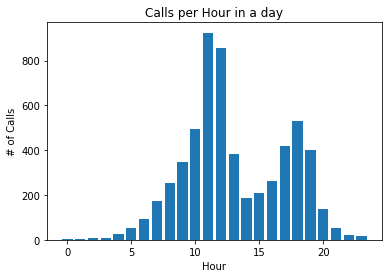

In [9]:
calls_per_hour = [len(hour) for hour in waiting_times_per_hour]
plt.bar(range(0,24),calls_per_hour)
plt.xlabel('Hour')
plt.ylabel('# of Calls')
plt.title('Calls per Hour in a day')

plt.show()

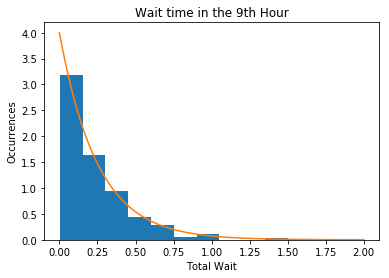

<Figure size 576x432 with 0 Axes>

In [96]:
plt.hist(waiting_times_per_hour[8], density = True)
x = np.linspace(0,2,200)
plt.plot(x,sts.expon.pdf(x,scale=1/4))
plt.xlabel('Total Wait')
plt.ylabel('Occurrences')
plt.title('Wait time in the 9th Hour')
plt.figure(figsize = (8,6))
plt.show()

In [43]:
alpha_1 = []
beta_1 = []
posterior_1 = []
data = []
for hour, waiting_times_hour in enumerate(waiting_times_per_hour):
    
    # prior 
    alpha_0 = 1
    beta_0 = 0.25
    
    # posterior
    alpha = alpha_0 + len(waiting_times_hour)
    beta = beta_0 + sum(waiting_times_hour)
    #print("Posterior for hour {:d} is: α = {:.2f}, β = {:.2f}".format(hour, alpha, beta))
    
    # posterior distribution
    posterior = stats.gamma(a=alpha, scale=1/beta)
    print ("98% confidence interval over lambda for hour {:d}: [{:.2f}, {:.2f}]".format(hour, posterior.ppf(0.01), posterior.ppf(0.99)))
    print ("mean of lambda: {:.2f}".format(posterior.mean()))
    data.append([posterior.ppf(0.01), posterior.ppf(0.99), posterior.mean()])
    #append data
    alpha_1.append(alpha)
    beta_1.append(beta)
    posterior_1.append(posterior)

98% confidence interval over lambda for hour 0: [0.03, 0.21]
mean of lambda: 0.10
98% confidence interval over lambda for hour 1: [0.02, 0.17]
mean of lambda: 0.07
98% confidence interval over lambda for hour 2: [0.03, 0.19]
mean of lambda: 0.09
98% confidence interval over lambda for hour 3: [0.09, 0.47]
mean of lambda: 0.24
98% confidence interval over lambda for hour 4: [0.27, 0.66]
mean of lambda: 0.44
98% confidence interval over lambda for hour 5: [0.64, 1.21]
mean of lambda: 0.90
98% confidence interval over lambda for hour 6: [1.23, 2.00]
mean of lambda: 1.59
98% confidence interval over lambda for hour 7: [2.40, 3.41]
mean of lambda: 2.88
98% confidence interval over lambda for hour 8: [3.66, 4.90]
mean of lambda: 4.26
98% confidence interval over lambda for hour 9: [5.04, 6.47]
mean of lambda: 5.73
98% confidence interval over lambda for hour 10: [7.44, 9.17]
mean of lambda: 8.28
98% confidence interval over lambda for hour 11: [14.19, 16.54]
mean of lambda: 15.34
98% confide

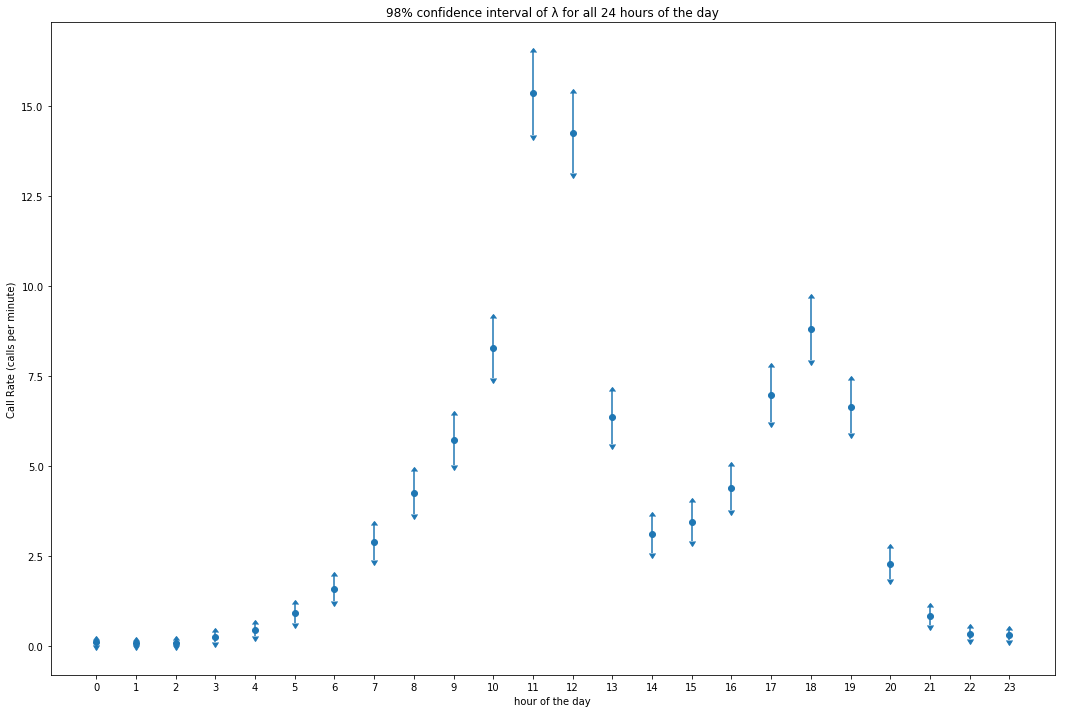

In [45]:
mean_per_hour = [post.mean() for post in posterior_per_hour]
confint_98 = [post.mean() - post.ppf(0.01) for post in posterior_per_hour]

plt.figure(figsize=(18, 12))
plt.errorbar(x=list(range(0, 24)), y=mean_per_hour, yerr=confint_98, fmt='o', uplims = True, lolims = True)
plt.title("98% confidence interval of λ for all 24 hours of the day")
plt.xlabel("hour of the day")
plt.xticks(list(range(0, 24)))
plt.ylabel("Call Rate (calls per minute)")
plt.show()

Over the course of 24 Hours, different call rates will be expected. As the day progresses, the calls start picking up around 5 - 6 AM, and then keep increasing til noon. This is the busiest time of the day for the company, with the mean call rate at 15.4 calls/minute, but even 16.54 calls/min which is the upper bound of the confidence interval is within possibility. Even though the mean number of calls (which is the expected number of calls) can be observed by the 'dots' in the diagram, there is a level of unpredictability that exists, which is what the accompanying error bars are there for. This means that the calls per minute can exist within any of those ranges for each hour. After noon, at around lunchtime the call rate significantly drops - all the way down to just above 2.5 calls/minute, but then it steadily picks up again through the evening. Finally, as the work day ends around 5PM, thats when the call rate starts dropping until it eventually becomes minimal near midnight.